In [42]:
from sklearn.datasets import load_iris, load_wine
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [43]:
def silhueta(X, y_km):
  # find cluster labels and number of clusters
  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]

  # calculate silhouettes
  silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

  # plot silhouette
  fig, ax = plt.subplots()
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      ax.barh(
          range(y_ax_lower, y_ax_upper),
          c_silhouette_vals, 
          height=1.0, edgecolor='none',
          color=color
      )
      yticks.append((y_ax_lower + y_ax_upper) / 2.)
      y_ax_lower += len(c_silhouette_vals)

  # calculate silhouette score    
  silhouette_avg = np.mean(silhouette_vals)

  ax.axvline(silhouette_avg, color="red", linestyle="--") 
  ax.set_yticks(yticks, cluster_labels + 1)
  ax.set_ylabel('Cluster')
  ax.set_xlabel('Silhouette coefficient')
  ax.plot()

In [44]:
#Carrega os dados
df = load_iris()
X, y = df["data"], pd.Series(df["target"])

In [45]:
#Padroniza os dados
X= StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns = df["feature_names"])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


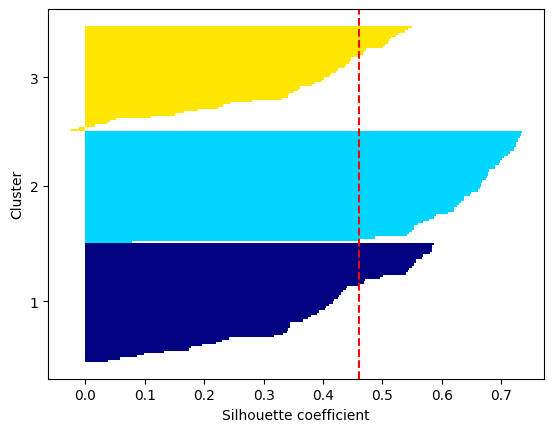

In [46]:
#Executa o kmeans com todas as colunas
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
silhueta(X, y_km)

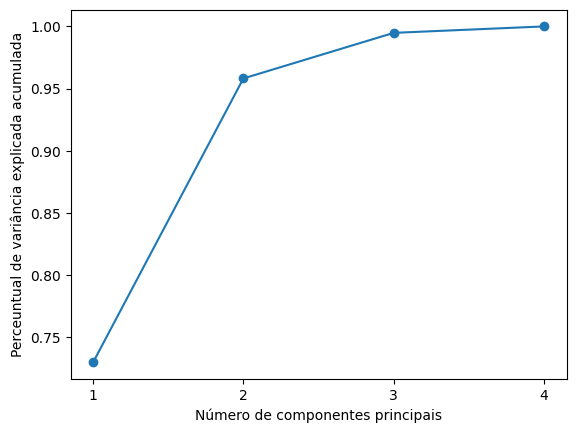

In [47]:
#Análise de componentes principais
pca = PCA()
pca.fit(X)

variancia_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


fig, ax = plt.subplots()
eixo_x = list(range(1, len(variancia_explicada_acumulada)+1))
ax.plot(eixo_x, variancia_explicada_acumulada, marker="o")
ax.set_xlabel("Número de componentes principais")
ax.set_ylabel("Perceuntual de variância explicada acumulada")
ax.set_xticks(eixo_x)
plt.show()

In [48]:
#Cria o novo dataset com os componentes selecionados
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

In [49]:
pd.DataFrame(X2)

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


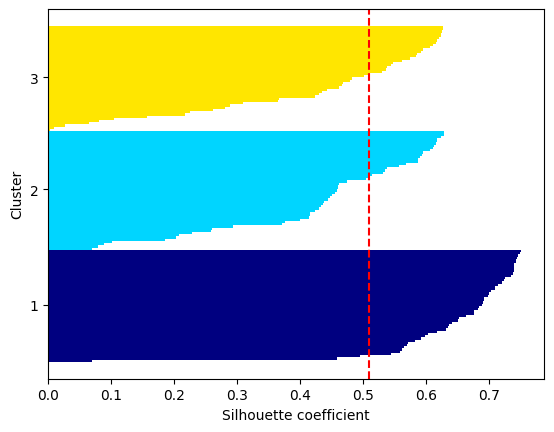

In [50]:
#Analisa o agrupamento com os novos dados
y_km2 = km.fit_predict(X2)
silhueta(X2, y_km2)

<Axes: >

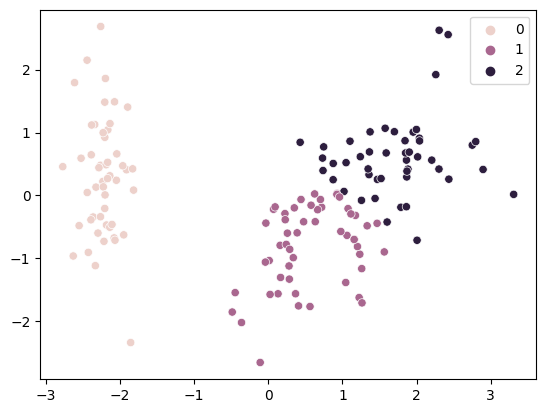

In [51]:
#Visualiza a partição
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=y_km2)